## Purpose: Noise scale estimation

Demonstration: 
    1. Parameter and noise scale fit
    2. Influence of noise scale estimation on the Evidence

Author: Do Kester


Import the necessary classes.

In [1]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

We construct data with a fixed amount of noise. 

In [2]:
N = 45
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

seed = numpy.random.seed( 10012018 )
noise = numpy.random.randn( N )
sig = 0.17
y = ym + sig * noise

We calculate the evidence for a polynomial model, for several values of  an assumed fixed noise scale (black line).
These values we compare with the evidence when we also optimize the noise scale (red in the plot).


              0.187   -11.518 [    1.218    0.555    0.342    0.257]
        0     0.100   -19.701 [    1.218    0.555    0.342    0.257]
        1     0.120   -13.485 [    1.218    0.555    0.342    0.257]
        2     0.140   -10.524 [    1.218    0.555    0.342    0.257]
        3     0.160    -9.199 [    1.218    0.555    0.342    0.257]
        4     0.180    -8.757 [    1.218    0.555    0.342    0.257]
        5     0.200    -8.817 [    1.218    0.555    0.342    0.257]
        6     0.220    -9.170 [    1.218    0.555    0.342    0.257]
        7     0.240    -9.698 [    1.218    0.555    0.342    0.257]
        8     0.260   -10.328 [    1.218    0.555    0.342    0.257]
        9     0.280   -11.016 [    1.218    0.555    0.342    0.257]
       10     0.300   -11.736 [    1.218    0.555    0.342    0.257]
       11     0.320   -12.468 [    1.218    0.555    0.342    0.257]
       12     0.340   -13.202 [    1.218    0.555    0.342    0.257]
       13     0.360   -13.931 [   

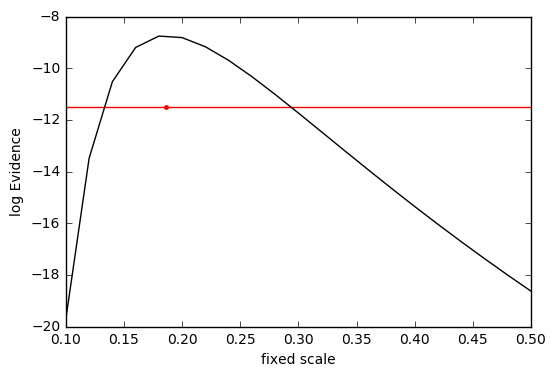

In [3]:
poly = PolynomialModel( 3 )
fitter = Fitter( x, poly )
param = fitter.fit( y )
scale = fitter.scale
logp = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
print( "         ", fmt( scale ), fmt( logp ), fmt(param) )
plt.plot( [scale], [logp], 'r.' )

scl = 0.1
ev = []
xs = []
for k in range( 21 ) :
    poly = PolynomialModel( 3 )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly, fixedScale=scl )
    param = fitter.fit( y )
    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100] )
    print( fmt( k ), fmt( scl ), fmt( logpr ), fmt( param ) )
    ev += [logpr]
    xs += [scl]
    scl += 0.02

plt.plot( xs, numpy.zeros_like( xs ) + logp, 'r-' )
plt.plot( xs, ev, 'k-' )
plt.xlim( 0.1, 0.5 )
plt.xlabel( "fixed scale" )
plt.ylabel( "log Evidence" )
plt.show()

The black evidence line is above the red line from about 0.13 to 0.30. 
This implies that only models with a fixed scale in that small range are 
more probable than models where we assume the noise scale unknown and we 
estimate the scale along with the parameters. The optimal estimate of the noise scale is 0.187 (red line).

Conclusion: Unless the noise scale is quite well known, it is better (i.e. yields higher evidence) to consider the noise scale a parameter of the problem. 

Note that the parameters are the same no matter what we assume the noise scale to be. They are orthogonal to each other.

==============================================================

Exercise: Vary the number of points, N, and look what happens to the evidence.